**1. Setup and Pre-requisites**

You need tools and frameworks for:

• PDF-to-Image Conversion: Convert PDF pages into images.

• Layout Detection and Parsing: Use vision-based models like Detectron2 or LayoutLMv3.

• Text Recognition (OCR): Use Tesseract or advanced OCR tools like Google Vision API.

• Table Detection and Parsing: Use vision models for table structure recognition.

## Install & setup required libraries:

In [ ]:
!pip install Pillow==9.5.0
!pip install pdfminer.six
# !pip install "layoutparser[effdet]"
!pip install pdf2image transformers datasets layoutparser
# !pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"
# !pip install "layoutparser[ocr]"
# !pip install layoutparser
!pip install numpy
!pip install pandas
!apt-get install poppler-utils # Install Poppler on Debian-based systems like Ubuntu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 0.1.0 requires pillow<12.0.0,>=10.0.0, but you have pillow 9.5.0 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
   ━━

## Convert PDF to Images

In [ ]:
from pdf2image import convert_from_path
# Convert PDF to images
pdf_path = "/content/AttensionAllYouNeed.pdf"

images = convert_from_path(pdf_path,first_page=1,last_page=7)
for i, image in enumerate(images):
  image.save(f"page_{i+1}.jpg")


In [ ]:
images[0].size

(1650, 2050)

## Step 2: Layout Detection with LayoutParser

Use layoutparser to detect headings, paragraphs, and tables in the document.

### Model Import

In [ ]:
import layoutparser as lp
from PIL import Image

# Load a pre-trained model for layout detection
model = lp.Detectron2LayoutModel(
   config_path="lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config",
   label_map={0: "Text", 1: "Title", 2: "List", 3: "Table", 4: "Figure"},
   extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8]
)

# # Process each page image
# for i, image_path in enumerate([f"page_{i+1}.png" for i in range(len(images))]):
#    image = Image.open(image_path)
#    layout = model.detect(image)
#    # Visualize layout (optional)
#    lp.draw_box(image, layout, box_width=3, show_element_type=True).show()
#    # Extract elements by type
#    # Use the filter_by method instead of get_by_label
#    headings = lp.Layout([b for b in layout if b.type == "Title"])
#    tables = lp.Layout([b for b in layout if b.type == "Table"])
#    paragraphs = lp.Layout([b for b in layout if b.type == "Text"])

config.yaml?dl=1: 8.19kB [00:01, 7.19kB/s]
model_final.pth?dl=1: 856MB [00:10, 83.0MB/s]                           
/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on 

In [ ]:
# table_model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_101_FPN_3x/config',
#                                  extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
#                                  label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})


config.yaml?dl=1: 8.19kB [00:01, 6.21kB/s]
model_final.pth?dl=1: 482MB [00:21, 22.6MB/s]                           
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


### Detected region output

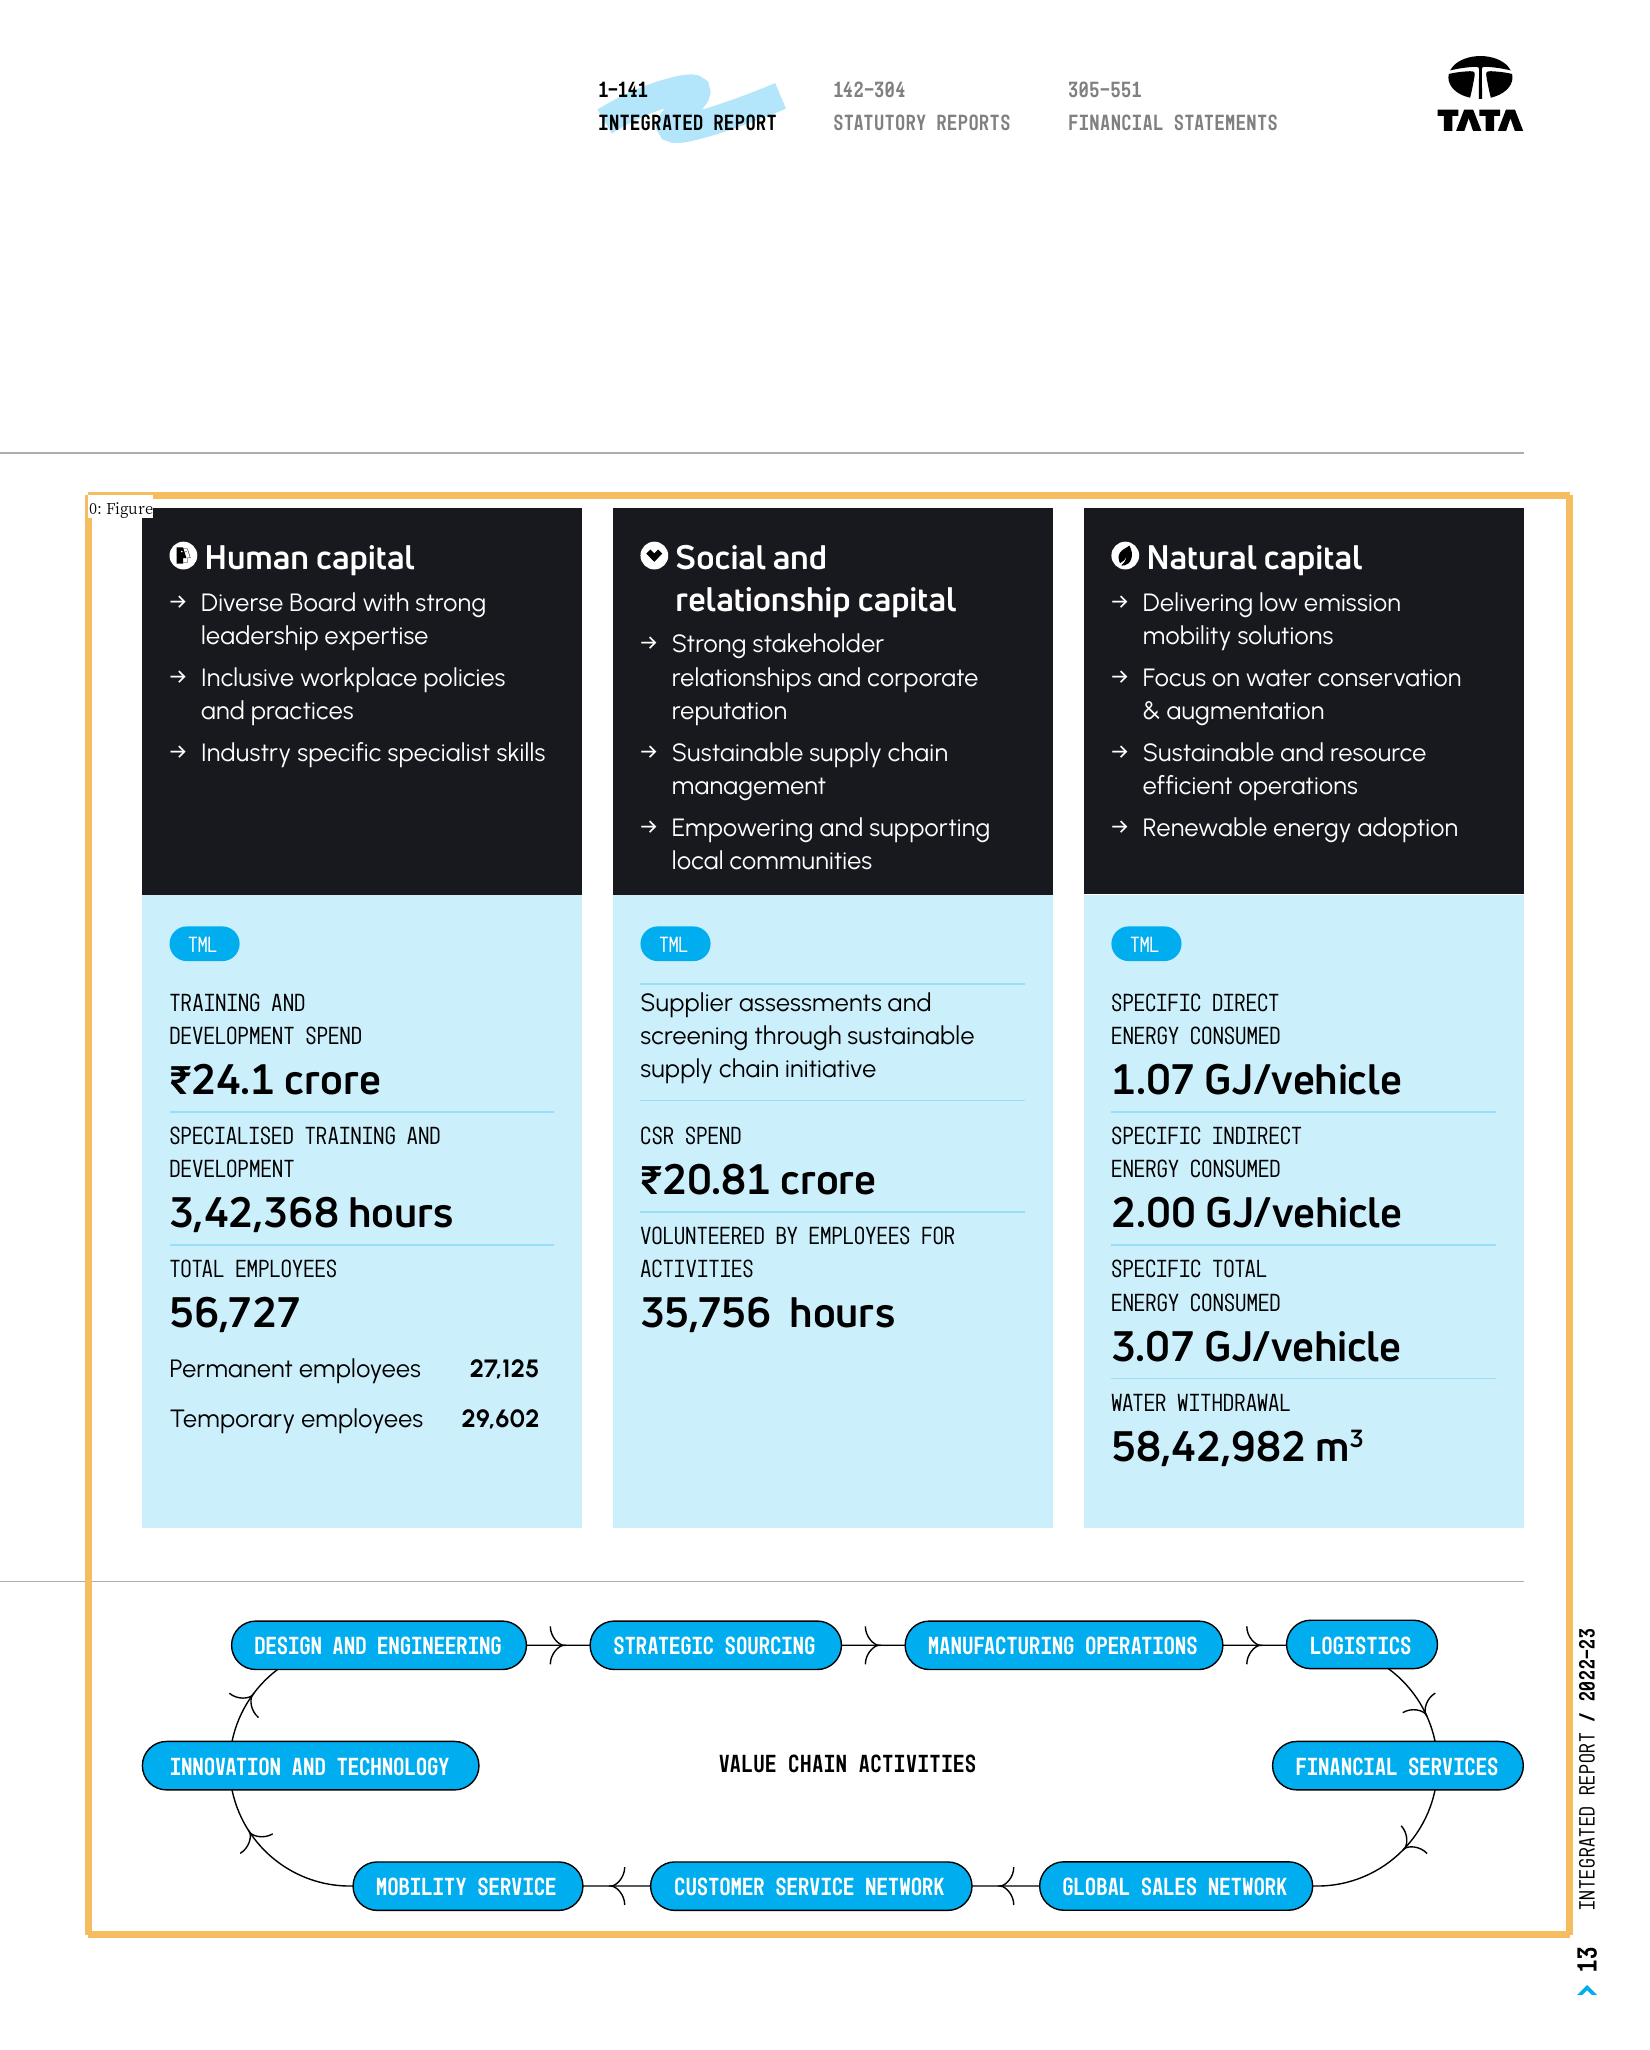

In [ ]:
page_num=9  #Enter page number
layout_1 = model.detect(images[page_num-1])
lp.draw_box(images[page_num-1], layout_1,
            show_element_type=True,
            show_element_id=True,
            box_width=7)

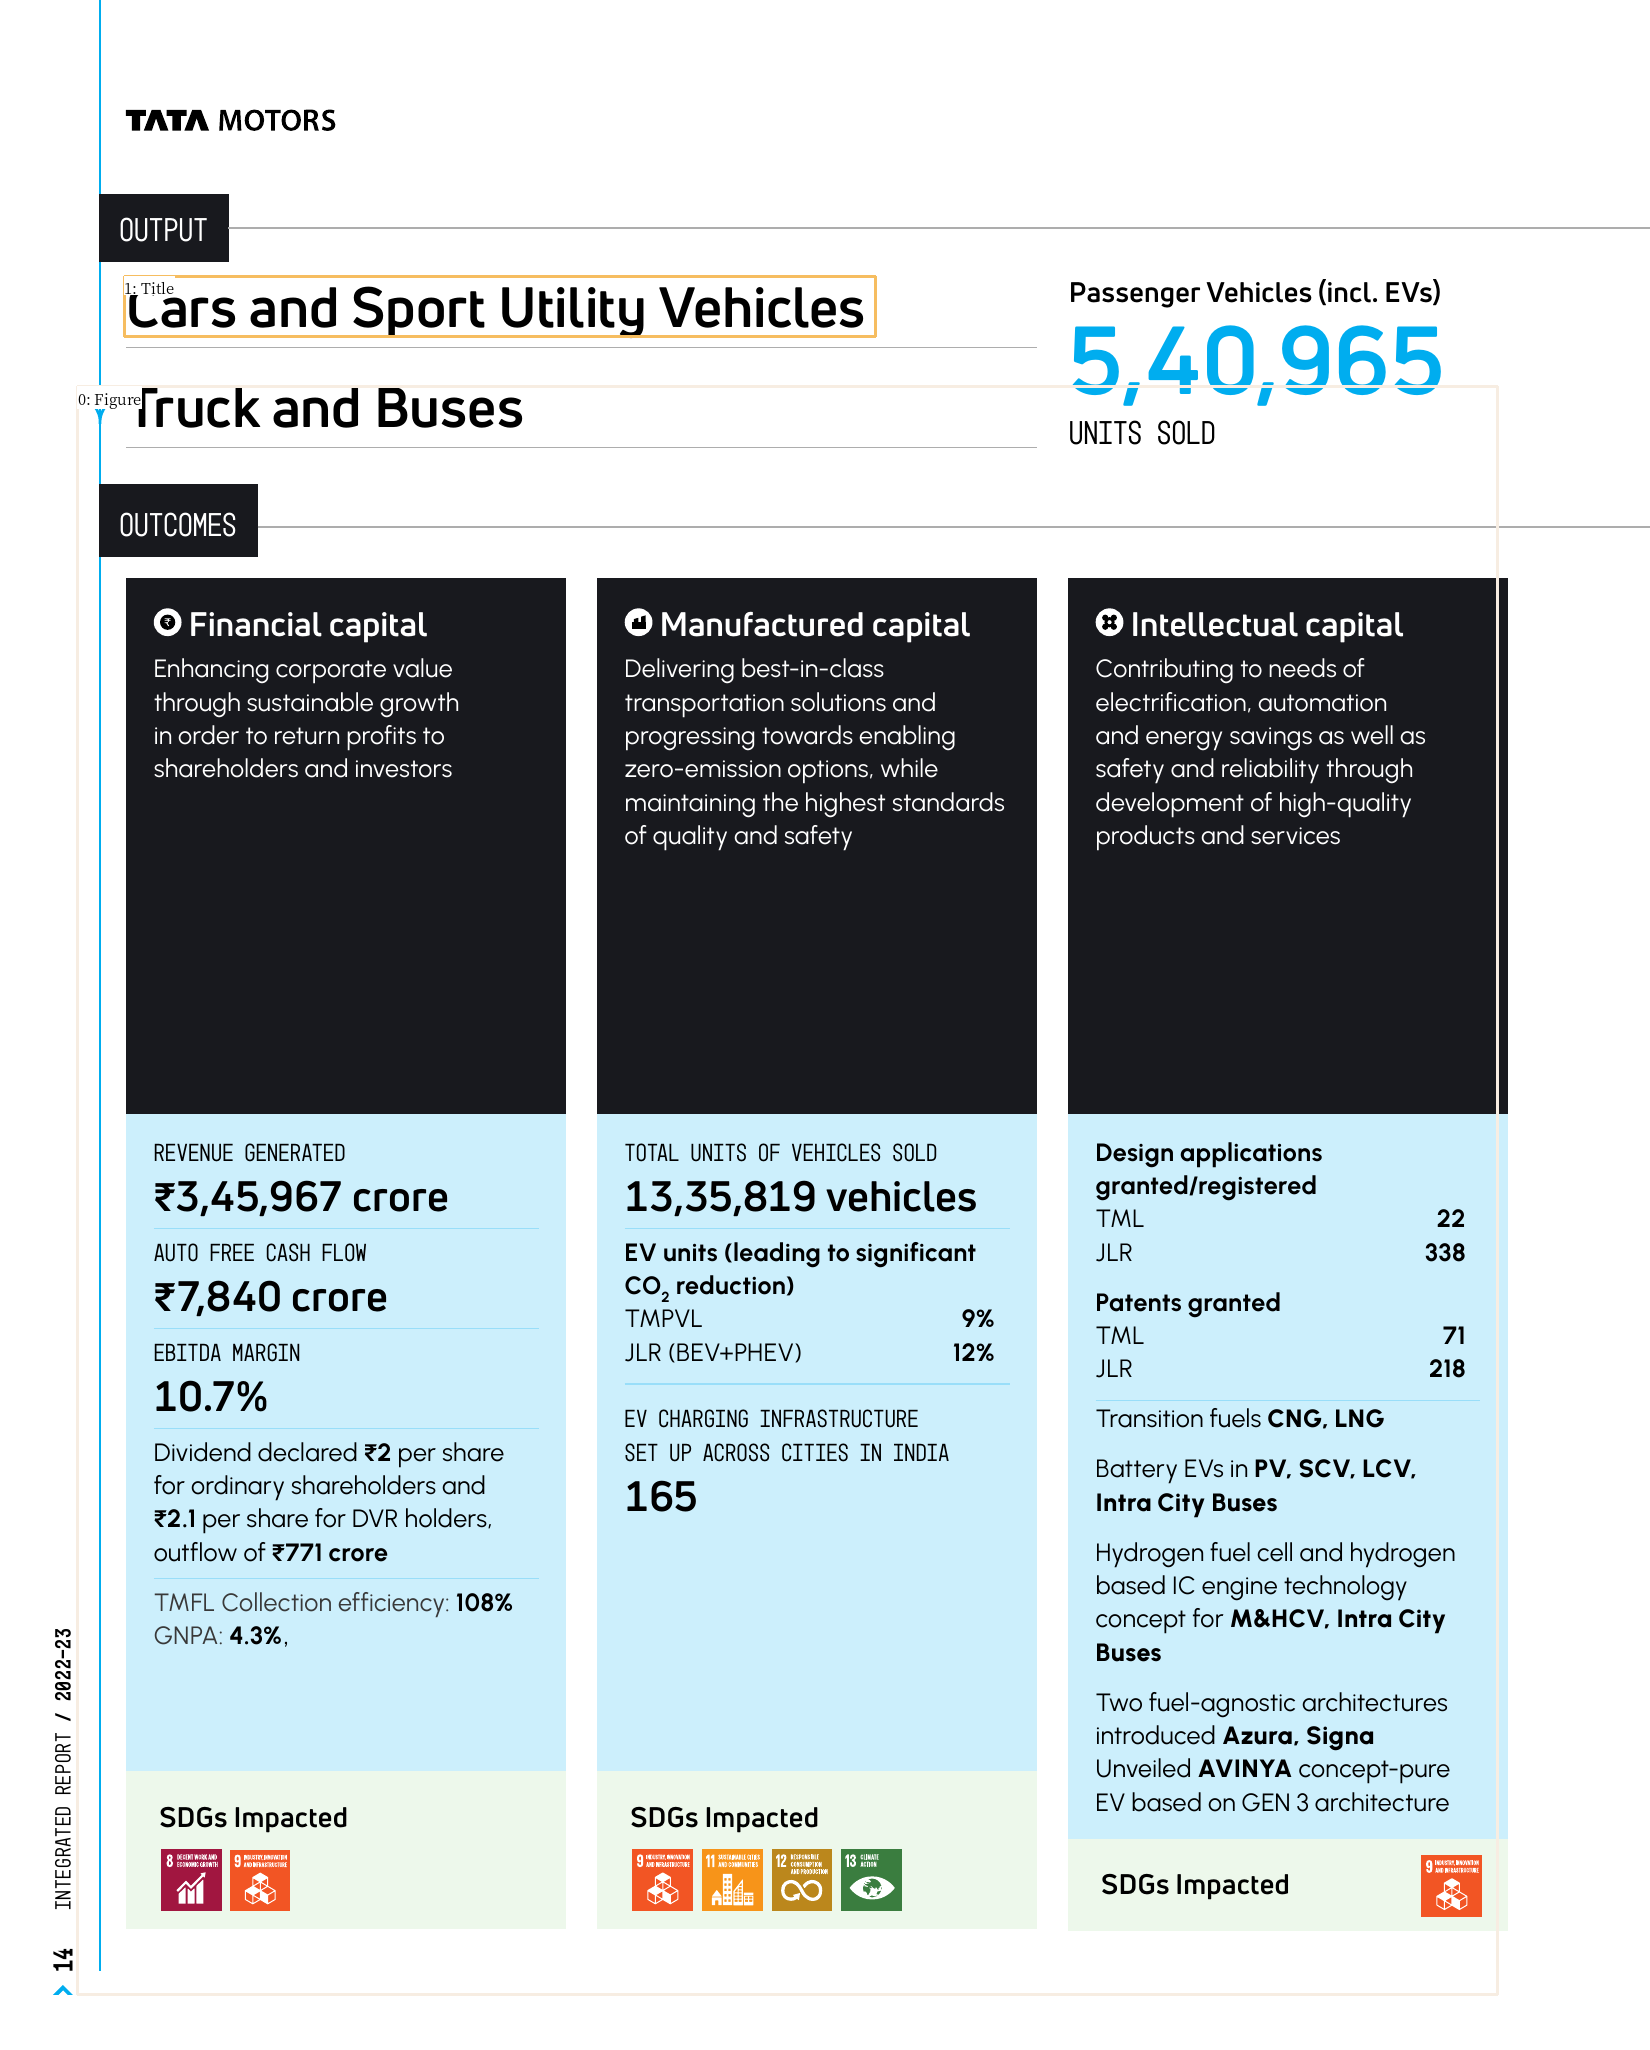

In [ ]:
page_num=10  #Enter page number
layout = model.detect(images[page_num-1])
lp.draw_box(images[page_num-1], layout,
            show_element_type=True,
            show_element_id=True,
            box_width=3)

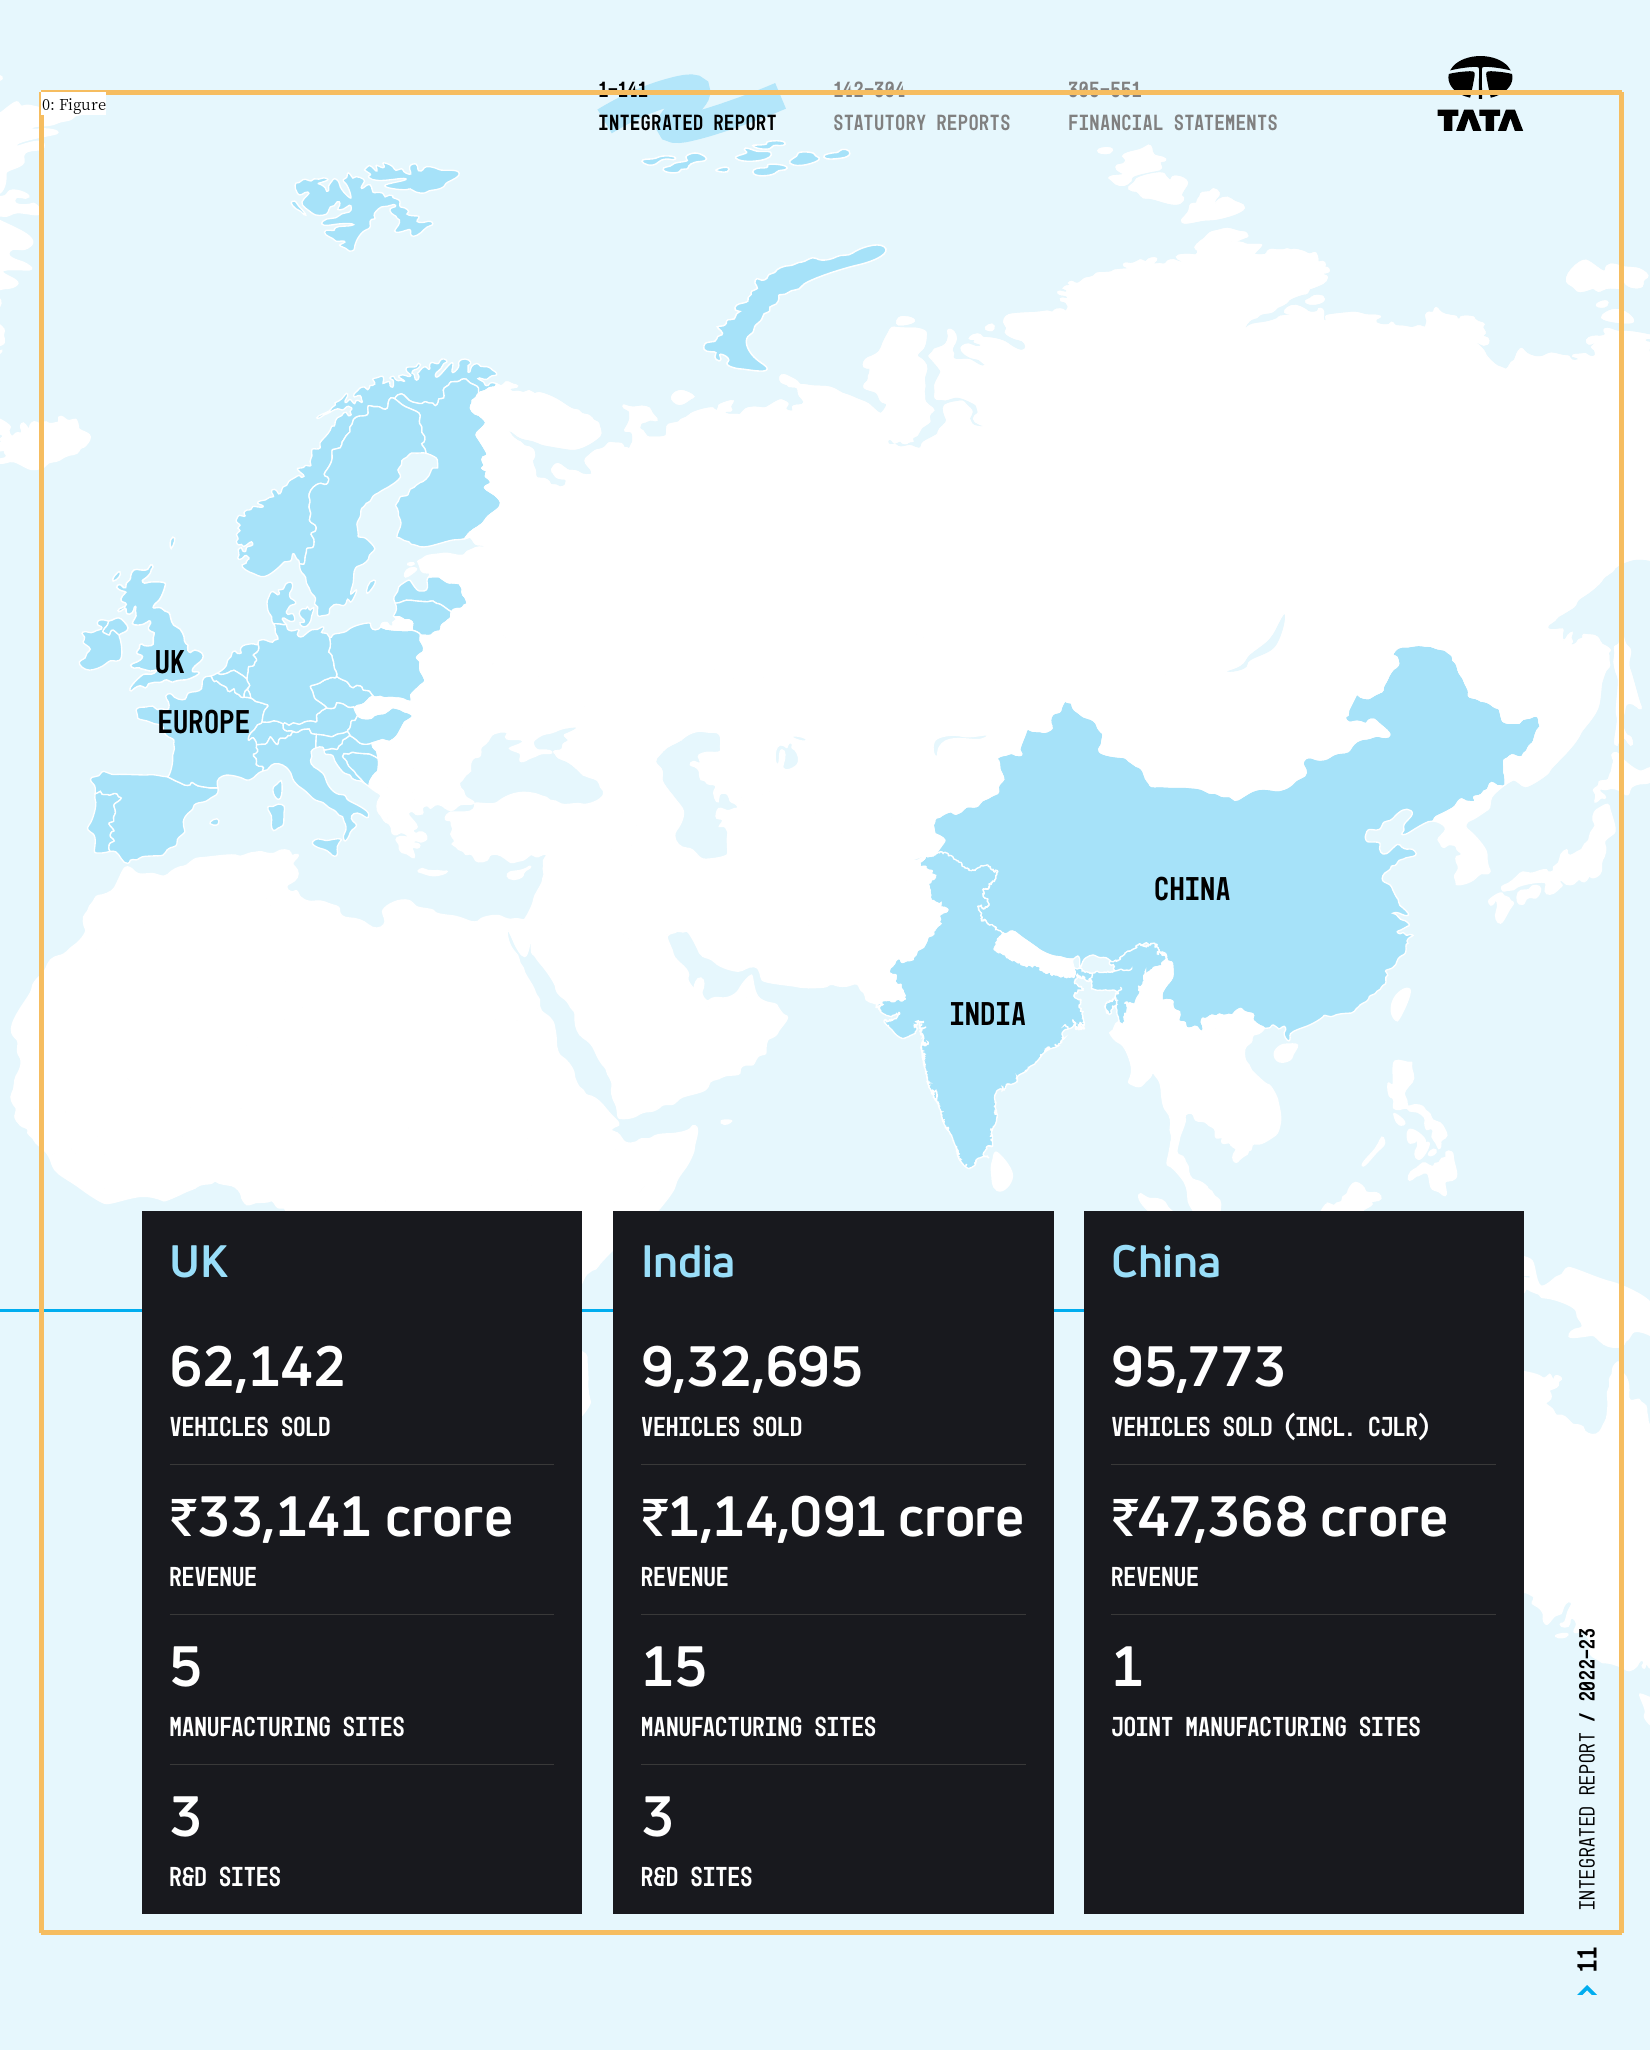

In [ ]:
page_num=7  #Enter page number
layout = model.detect(images[page_num-1])
lp.draw_box(images[page_num-1], layout,
            show_element_type=True,
            show_element_id=True,
            box_width=5)

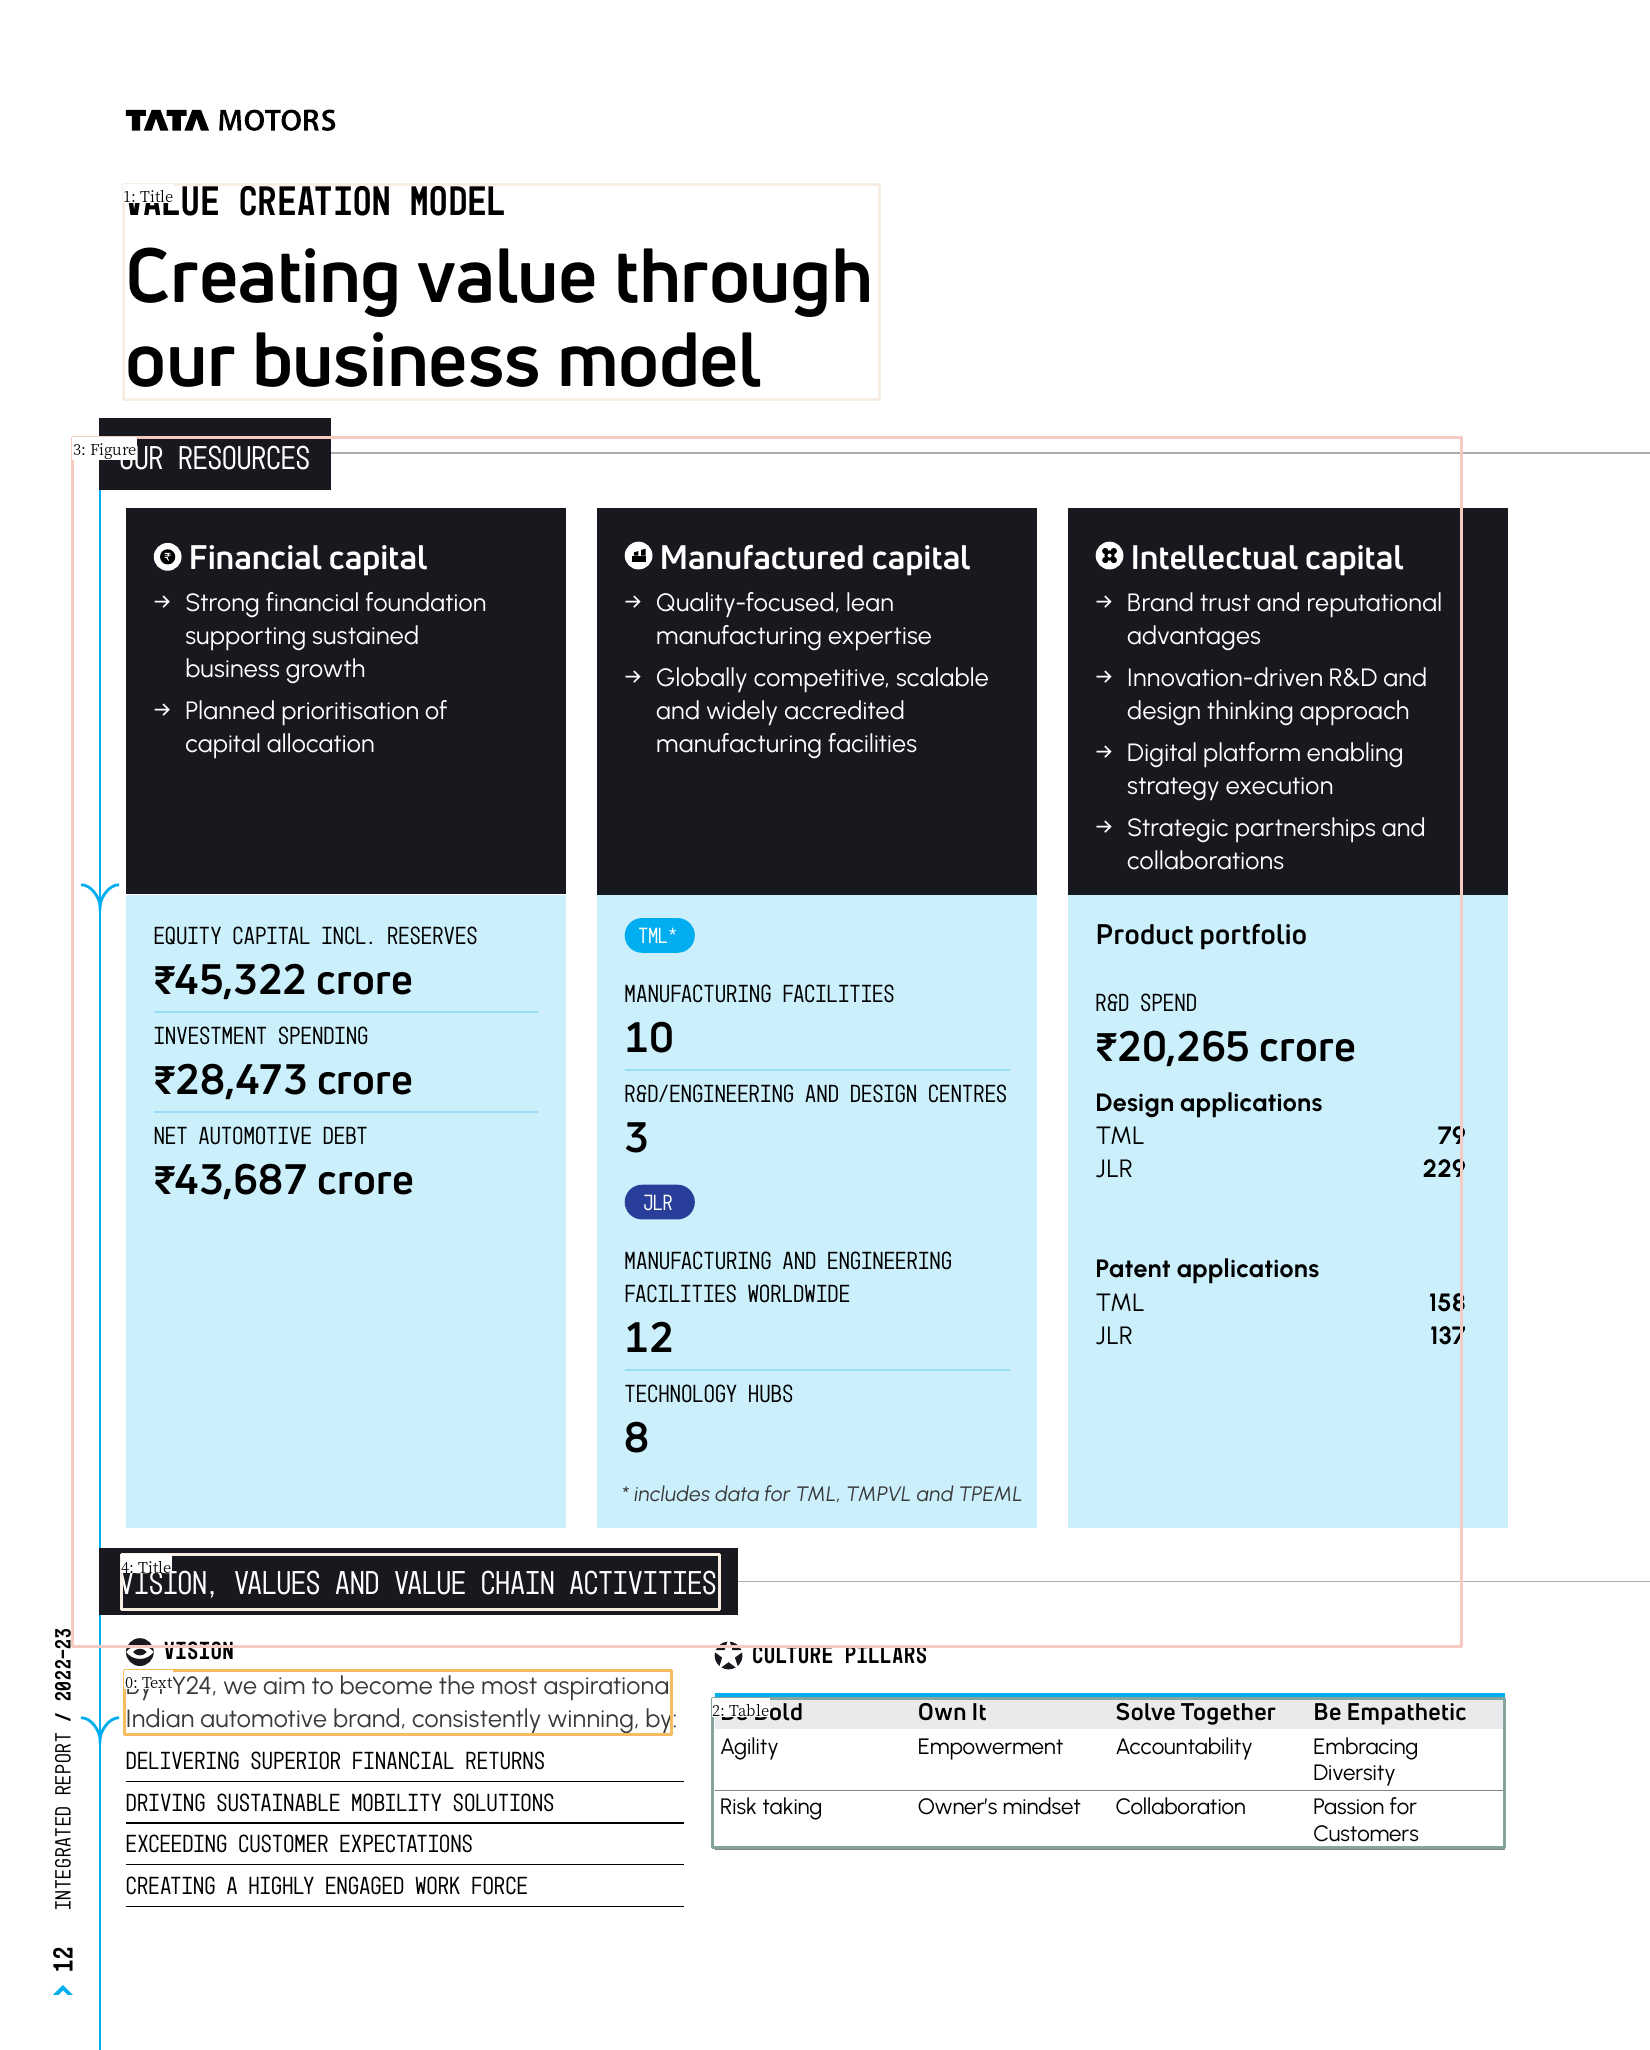

In [ ]:
page_num=8  #Enter page number
layout = model.detect(images[page_num-1])
lp.draw_box(images[page_num-1], layout,
            show_element_type=True,
            show_element_id=True,
            box_width=3)

## Step 3: Text Recognition with OCR

Use pytesseract or similar OCR tools to extract text from detected regions.

In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.2 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 119665 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-en

In [ ]:
!pip install pytesseract
import pytesseract

  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)


In [ ]:
layout_1

Layout(_blocks=[TextBlock(block=Rectangle(x_1=396.0396728515625, y_1=1149.2750244140625, x_2=1304.7269287109375, y_2=1603.9998779296875), text=None, id=None, type=Text, parent=None, next=None, score=0.9996658563613892), TextBlock(block=Rectangle(x_1=300.7125244140625, y_1=1659.9090576171875, x_2=1395.92138671875, y_2=1912.2822265625), text=None, id=None, type=Text, parent=None, next=None, score=0.998485267162323), TextBlock(block=Rectangle(x_1=787.9589233398438, y_1=1068.03076171875, x_2=911.6016845703125, y_2=1105.469970703125), text=None, id=None, type=Title, parent=None, next=None, score=0.9846664667129517), TextBlock(block=Rectangle(x_1=323.17962646484375, y_1=1914.3626708984375, x_2=778.2095336914062, y_2=1973.6842041015625), text=None, id=None, type=Text, parent=None, next=None, score=0.8853099942207336), TextBlock(block=Rectangle(x_1=335.50079345703125, y_1=1910.875244140625, x_2=745.0589599609375, y_2=1941.7974853515625), text=None, id=None, type=Text, parent=None, next=None, s

In [ ]:
def extract_text(image, blocks):
    """Extract text from layout blocks using OCR."""
    texts = []
    for block in blocks:
        cropped_region = image.crop(block.coordinates)
        text = pytesseract.image_to_string(cropped_region)
        texts.append((block.coordinates, text.strip()))
    return texts

image=images[0]
# layout_1 = model.detect(image)
lists = [ele for ele in layout_1 if ele.type == "Text"]
list_texts = extract_text(image, lists)
list_texts

[((396.0396728515625,
   1149.2750244140625,
   1304.7269287109375,
   1603.9998779296875),
  'The dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to\nbe superior in quality while being more parallelizable and requiring significantly\nless time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-\nto-German translation task, improving over the existing best results, including\nensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,\nour model establishes a new single-model state-of-the-art BLEU score of 41.8 after\ntraining for 3.5 days on eight GP

In [ ]:
def determine_layout(paragraphs):

    """Determine if the layout is single or multi-column based on x-coordinates."""

    column_split_threshold = 100  # Minimum gap to consider as two columns

    x_coords = [p.coordinates[0] for p in paragraphs]

    return max(x_coords) - min(x_coords) > column_split_threshold

def split_columns(elements, page_width):

    """Split elements into left and right columns."""

    mid_x = page_width // 2

    left_column = [e for e in elements if e.coordinates[0] < mid_x]

    right_column = [e for e in elements if e.coordinates[0] >= mid_x]

    return left_column, right_column

def group_elements(elements, image):

    """Group paragraphs and lists under their nearest heading."""

    grouped_data = {}

    current_heading = None

    # Extract text for elements

    texts = []

    for element in elements:

        cropped_region = image.crop(element.coordinates)

        text = pytesseract.image_to_string(cropped_region)

        texts.append((element.coordinates, element.type, text.strip()))

    # Sort elements by vertical position (y1 coordinate)

    texts.sort(key=lambda x: x[0][1])

    for coords, elem_type, text in texts:

        if elem_type == "Title":  # Heading

            current_heading = text

            grouped_data[current_heading] = {"Text": [], "Lists": []}

        else:  # Content elements (Text or List)

            if current_heading:

                if elem_type == "Text":

                    grouped_data[current_heading]["Text"].append(text)

                elif elem_type == "List":

                    grouped_data[current_heading]["Lists"].append(text)

            else:  # Assign to "None" heading if no current heading exists

                grouped_data.setdefault("None", {"Text": [], "Lists": []})

                if elem_type == "Text":

                    grouped_data["None"]["Text"].append(text)

                elif elem_type == "List":

                    grouped_data["None"]["Lists"].append(text)

    return grouped_data

def process_page(image_path, model):

    # Load image

    image = Image.open(image_path)

    layout = model.detect(image)

    # Separate elements by type
    headings = [ele for ele in layout if ele.type == "Title"]
    texts = [ele for ele in layout if ele.type == "Text"]
    lists = [ele for ele in layout if ele.type == "List"]

    # Combine all detected elements

    all_elements = headings + texts + lists

    # Determine if layout is single or multi-column

    is_multicolumn = determine_layout(texts)

    if is_multicolumn:

        # Split elements into two columns

        left_elements, right_elements = split_columns(all_elements, image.width)

        # Group elements for each column

        left_data = group_elements(left_elements, image)

        right_data = group_elements(right_elements, image)

        # Return combined results

        return {"Left Column": left_data, "Right Column": right_data}

    else:

        # Single column: process all elements together

        all_data = group_elements(all_elements, image)

        return {"Single Column": all_data}

# Example usage

image_path = "page_1.jpg"  # Replace with the path to your image

result = process_page(image_path, model)

# Print results

import json

print(json.dumps(result, indent=4))

{
    "Left Column": {
        "LayoutLM: Pre-training of Text and Layout for\nDocument Image Understanding": {
            "Text": [
                "Minghao Li\u2019",
                "Yiheng Xu\u2019",
                "charlesyihengxu@gmail.com\nHarbin Institute of Technology"
            ],
            "Lists": []
        },
        "ABSTRACT": {
            "Text": [
                "Pre-training techniques have been verified successfully in a vari-\nety of NLP tasks in recent years. Despite the widespread use of\npre-training models for NLP applications, they almost exclusively\nfocus on text-level manipulation, while neglecting layout and style\ninformation that is vital for document image understanding. In\nthis paper, we propose the LayoutLM to jointly model interactions\nbetween text and layout information across scanned document\nimages, which is beneficial for a great number of real-world doc-\nument image understanding tasks such as information extraction\nfrom scanned doc

In [ ]:
def detect_columns(layout, page_width):

    """Detect if the page has one or two columns based on the layout."""

    column_split = page_width // 2
    left_elements = [el for el in layout if el.coordinates[0] < column_split]
    right_elements = [el for el in layout if el.coordinates[0] >= column_split]

    # Check if both columns have sufficient elements to consider as two columns
    if len(left_elements) > 2 and len(right_elements) > 2:
        return "two_column", column_split
    return "single_column", None

def extract_text(image, blocks):
    """Extract text from layout blocks using OCR."""
    texts = []
    for block in blocks:
        cropped_region = image.crop(block.coordinates)
        text = pytesseract.image_to_string(cropped_region)
        texts.append((block.coordinates, text.strip()))
    return texts

def group_paragraphs(headings, paragraphs, lists, image):

    """Group paragraphs under their nearest headings, or assign None."""
    grouped_data = {}
    current_heading = None

    # Extract texts for headings and paragraphs

    heading_texts = extract_text(image, headings)
    paragraph_texts = extract_text(image, paragraphs)
    list_texts = extract_text(image, lists)


    # Combine all texts

    all_texts = heading_texts + paragraph_texts + list_texts

    # Group paragraphs under headings

    for paragraph_coords, paragraph_text in paragraph_texts:
        # Check for the nearest preceding heading
        for heading_coords, heading_text in heading_texts:
            if heading_coords[1] < paragraph_coords[1]:  # Heading above paragraph
                current_heading = heading_text
            else:
                break  # Stop if heading is below the paragraph

        # Assign paragraph to the current heading or None
        if current_heading:
            grouped_data.setdefault(current_heading, []).append(paragraph_text)
        else:
            grouped_data.setdefault("None", []).append(paragraph_text)
    return grouped_data

def process_page(image_path, model):
    # Load image

    image = Image.open(image_path)

    # Detect layout

    layout = model.detect(image)

    page_width = image.width

    # Determine if the layout is single or two-column

    layout_type, column_split = detect_columns(layout, page_width)

    # Filter layout elements

    headings = [ele for ele in layout if ele.type == "Title"]
    paragraphs = [ele for ele in layout if ele.type == "Text"]
    lists = [ele for ele in layout if ele.type == "List"]


    if layout_type == "single_column":

        # Sort elements by vertical position (top-down)

        all_elements = headings + paragraphs + lists

        all_elements.sort(key=lambda x: x.coordinates[1])

        return group_paragraphs(headings, paragraphs, lists, image)

    elif layout_type == "two_column":

        # Separate elements into left and right columns

        left_headings = [h for h in headings if h.coordinates[0] < column_split]

        right_headings = [h for h in headings if h.coordinates[0] >= column_split]

        left_paragraphs = [p for p in paragraphs if p.coordinates[0] < column_split]

        right_paragraphs = [p for p in paragraphs if p.coordinates[0] >= column_split]

        # Sort elements by vertical position within each column

        left_headings.sort(key=lambda x: x.coordinates[1])

        left_paragraphs.sort(key=lambda x: x.coordinates[1])

        right_headings.sort(key=lambda x: x.coordinates[1])

        right_paragraphs.sort(key=lambda x: x.coordinates[1])

        # Group paragraphs for each column

        left_data = group_paragraphs(left_headings, left_paragraphs, lists, image)

        right_data = group_paragraphs(right_headings, right_paragraphs, lists, image)
        # Combine results
        return {"Left Column": left_data, "Right Column": right_data}


In [ ]:
image_path = "page_1.jpg"  # Replace with your image path

grouped_result = process_page(image_path, model)

if "Left Column" in grouped_result:  # Two-column layout
    for column, data in grouped_result.items():
        # print(f"--- {column} ---")
        for heading, paragraphs in data.items():
            print(f"Heading: {heading}")
            for paragraph in paragraphs:
                print(f"Paragraph: {paragraph}")

else:  # Single-column layout
    for heading, paragraphs in grouped_result.items():
        print(f"Heading: {heading}")
        for paragraph in paragraphs:
            print(f"Paragraph: {paragraph}")

Heading: LayoutLM: Pre-training of Text and Layout for
Document Image Understanding
Paragraph: Minghao Li’
Paragraph: Yiheng Xu’
Paragraph: charlesyihengxu@gmail.com
Harbin Institute of Technology
Heading: ABSTRACT
Paragraph: Pre-training techniques have been verified successfully in a vari-
ety of NLP tasks in recent years. Despite the widespread use of
pre-training models for NLP applications, they almost exclusively
focus on text-level manipulation, while neglecting layout and style
information that is vital for document image understanding. In
this paper, we propose the LayoutLM to jointly model interactions
between text and layout information across scanned document
images, which is beneficial for a great number of real-world doc-
ument image understanding tasks such as information extraction
from scanned documents. Furthermore, we also leverage image
features to incorporate words’ visual information into LayoutLM
To the best of our knowledge, this is the first time that text and


In [ ]:
image_path = "page_2.jpg"  # Replace with your image path

grouped_result = process_page(image_path, model)

if "Left Column" in grouped_result:  # Two-column layout
    for column, data in grouped_result.items():
        print(f"--- {column} ---")
        for heading, paragraphs in data.items():
            print(f"Heading: {heading}")
            for paragraph in paragraphs:
                print(f"Paragraph: {paragraph}")

else:  # Single-column layout
    for heading, paragraphs in grouped_result.items():
        print(f"Heading: {heading}")
        for paragraph in paragraphs:
            print(f"Paragraph: {paragraph}")

--- Left Column ---
Heading: None
Paragraph: Figure 1: Scanned images of business documents with different layouts and formats
Paragraph: information extraction from business documents. Although these
models have made significant progress in the document AI area
with deep neural networks, most of these methods confront two
limitations: (1) They rely on a few human-labeled training samples
without fully exploring the possibility of using large-scale unla-
beled training samples. (2) They usually leverage either pre-trained
CV models or NLP models, but do not consider a joint training of
textual and layout information. Therefore, it is important to inves-
tigate how self-supervised pre-training of text and layout may help
in the document AI area.
Paragraph: To this end, we propose LayoutLM, a simple yet effective pre-
training method of text and layout for document image understand.
ing tasks. Inspired by the BERT model [4], where input textual
information is mainly represented by text e

# PDF/Image Dimension conversion

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (308 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install pymupdf
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
# prompt: get the pdf shape and dimension
dpi=300
from pdf2image import convert_from_path

pdf_path = "/content/AttensionAllYouNeed.pdf"

images = convert_from_path(pdf_path,dpi=dpi, first_page=1, last_page=1)
# Get dimensions of the first page
width, height = images[0].size
print(f"Width: {width}, Height: {height}")
print(f"Width: {width/dpi}, Height: {height/dpi}  in Inches") #inches

Width: 2550, Height: 3301
Width: 8.5, Height: 11.003333333333334  in Inches


In [ ]:
import fitz

# Open the PDF document
doc = fitz.open(pdf_path)

# Get dimensions of the first page (you can loop for all pages)
page = doc[0]
width = page.rect.width
height = page.rect.height

print(f"Width: {width}, Height: {height}")
print(f"Width: {width*(1/72)},Height: {height*(1/72)}  in Inches")
# Close the document
doc.close()

Width: 612.0, Height: 792.0
Width: 8.5,Height: 11.0  in Inches


In [ ]:
from PyPDF2 import PdfReader
def map_image_to_pdf_coordinates(pdf_path, image_width, image_height, dpi, rect_image):

   # Extract PDF dimensions in points
   reader = PdfReader(pdf_path)
   page = reader.pages[0]  # Assuming single-page PDF or first page
   pdf_width_points = page.mediabox.width
   pdf_height_points = page.mediabox.height

   # Convert PDF dimensions to inches
   pdf_width_inches = pdf_width_points / 72
   pdf_height_inches = pdf_height_points / 72

   # Convert PDF dimensions to pixels based on DPI
   pdf_width_pixels = pdf_width_inches * dpi
   pdf_height_pixels = pdf_height_inches * dpi

   # Calculate scaling factors
   scale_x = pdf_width_points / pdf_width_pixels
   scale_y = pdf_height_points / pdf_height_pixels

   # Map rectangle coordinates from image to PDF
   x1_image, y1_image, x2_image, y2_image = rect_image
   x1_pdf = x1_image * scale_x
   y1_pdf = (image_height - y1_image) * scale_y  # Adjust for image origin at top-left
   x2_pdf = x2_image * scale_x
   y2_pdf = (image_height - y2_image) * scale_y  # Adjust for image origin at top-left

   return x1_pdf, y1_pdf, x2_pdf-x1_pdf, y2_pdf-y1_pdf

  #  return round(x1_pdf, 2), round(y1_pdf, 2), round(x2_pdf, 2), round(y2_pdf, 2)

# Example Usage
# pdf_path = "/content/croppped_annual_report.pdf"
image_width = 2550  # Width of the image in pixels
image_height = 3301  # Height of the image in pixels
dpi = dpi  # DPI used for the image conversion
rect_image = (601.4289, 1729.9248, 1947.0867, 2387.3311)  # Rectangle in image (x1, y1, x2, y2)
rect_pdf = map_image_to_pdf_coordinates(pdf_path, image_width, image_height, dpi, rect_image)
print(rect_pdf)


(144.34293599999998, 377.058048, 322.95787200000007, -157.77751199999997)


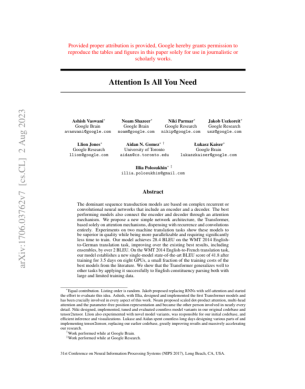

In [ ]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import io
# Path to your PDF file
# pdf_path = "example.pdf"
# Open the PDF file
doc = fitz.open(pdf_path)
# Choose a page (e.g., the first page, index 0)
page_index = 0
page = doc[page_index]
# Render the page to a PIL image
pix = page.get_pixmap()
img = pix.tobytes("png")
# Display the page using Matplotlib
img_data = io.BytesIO(img)  # Create a BytesIO object from the image bytes
img_plot = plt.imshow(plt.imread(img_data))
# Add rectangles (coordinates are in the format: x, y, width, height)
# Example: Drawing a rectangle (change coordinates as needed)
rect_coords = [(144.34293599999998, 377.058048, 467.300808, 219.280536)] # Example rectangles
for x, y, w, h in rect_coords:
   rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='red')
   ax.add_patch(rect)
# Turn off axes
plt.axis('off')
# Show the plot
plt.show()
# Close the PDF file
doc.close()

# Extract HTML using PDFMINER

In [ ]:
from io import StringIO
from pdfminer.high_level import extract_text_to_fp
from pdfminer.layout import LAParams
output_string = StringIO()
with open('/content/CI-Assistant Project.pdf', 'rb') as fin:
    extract_text_to_fp(fin, output_string, laparams=LAParams(),
                       output_type='html', codec=None)

In [ ]:
# print(output_string.getvalue())

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# Example HTML code as a string
html = output_string.getvalue()
# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
# Extract elements with inline styles
elements = soup.find_all(name='span',style=True)
final={}
# print(elements)
# Loop through the elements to extract font properties and text
total_fontsize=[]
total_fontfamily=[]

for element in elements:
    style = element.get("style")
    text = element.text.strip()

    # Parse the style attribute
    styles = dict(item.strip().split(":") for item in style.split(";") if ":" in item)
    font_size = styles.get("font-size", "N/A")
    print(font_size)
    print(text)
    print("-" * 40)
    # if font_size!="N/A":
    #   total_fontsize.append(font_size)
    #   total_fontfamily.append(font_family)
    # else:
    #   pass



# df=pd.DataFrame({"Font Size":total_fontsize,"Font Family":total_fontfamily})

# print(f"Text: {type(text)}")
# print(f"Text: {text}")
# print(f"Font Size: {font_size}")
# print(f"Font Family: {font_family}")
# print("-" * 40)

N/A

----------------------------------------
20px
⦁
----------------------------------------
20px
Project Overview
----------------------------------------
11px
It is meant for all Agent based capabilities. Will handle all the various async APIs. Agent 
architecture is all custom created and relies heavily on events and queues for all 
communication.
----------------------------------------
11px
The overall project has various folders for each of the modules. The project itself is run 
from the main.py file in root folder and gets all the various configurations from a 
settings.py file in root folder as well.
----------------------------------------
11px
There’s also an .env file that has the client_id and client_secret obtained from OAUTH 
based SSO registration with the CI-Assistant project. Each local instance that’s running 
both the projects, will need to create its own id and secret and use that.
----------------------------------------
15px
⦁
-----------------------------------

In [ ]:
df['Font Size'].value_counts()

,count
Font Size,
11px,135
15px,42
14px,12
20px,10


In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# Example HTML code as a string
html = output_string.getvalue()
# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
# Extract elements with inline styles
elements = soup.find_all(name='span',style=True)
final={}
# print(elements)
# Loop through the elements to extract font properties and text

for element in elements:
    style = element.get("style")
    text = element.text.strip()

    # Parse the style attribute
    styles = dict(item.strip().split(":") for item in style.split(";") if ":" in item)
    font_size = styles.get("font-size", "N/A")
    font_family = styles.get("font-family", "N/A")

    print(text)
    # Check if font_size is numeric before converting to int
    if font_size[:-2].isdigit():
        if int(font_size[:-2])>11:
          print(f"++++++Heading+++++++++++++")
          print(f"Font Size: {font_size}")
          print(f"Font Family: {font_family}")
          print("-" * 40)
        else:
          print(f"++++++Paragraph+++++++++++++")
          print(f"Font Size: {font_size}")
          print(f"Font Family: {font_family}")
          print("-" * 40)
    # else:
    #      print("Font size is not numeric, skipping...") # Optional: Print a message for non-numeric font sizes




⦁
++++++Heading+++++++++++++
Font Size: 20px
Font Family:  F1
----------------------------------------
Project Overview
++++++Heading+++++++++++++
Font Size: 20px
Font Family:  F2
----------------------------------------
It is meant for all Agent based capabilities. Will handle all the various async APIs. Agent 
architecture is all custom created and relies heavily on events and queues for all 
communication.
++++++Paragraph+++++++++++++
Font Size: 11px
Font Family:  F2
----------------------------------------
The overall project has various folders for each of the modules. The project itself is run 
from the main.py file in root folder and gets all the various configurations from a 
settings.py file in root folder as well.
++++++Paragraph+++++++++++++
Font Size: 11px
Font Family:  F2
----------------------------------------
There’s also an .env file that has the client_id and client_secret obtained from OAUTH 
based SSO registration with the CI-Assistant project. Each local instance 

# Heading detection using pdf miner

In [ ]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.9 MB/s eta 0:00:00


In [ ]:
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTTextLineHorizontal
def extract_headings_and_text(pdf_path):
   content = {"headings": [], "paragraphs": []}
   for page_layout in extract_pages(pdf_path):
       for element in page_layout:
           if isinstance(element, LTTextContainer):
               for text_line in element:
                   if isinstance(text_line, LTTextLineHorizontal):
                       # Check font size and style
                       font_size = None
                       if text_line._objs and hasattr(text_line._objs[0], 'size'):
                           font_size = text_line._objs[0].size
                       text = text_line.get_text().strip()
                       if not text:
                           continue
                       # Assume headings have a larger font size threshold
                       if font_size and font_size > 12:  # Adjust the threshold
                           content["headings"].append({"text": text, "font_size": font_size})
                       else:
                           content["paragraphs"].append(text)
   return content
# Use the function
pdf_path = "/content/CI-Assistant Project.pdf"  # Replace with your PDF file path
result = extract_headings_and_text(pdf_path)
print("Headings:", result["headings"])
print("Paragraphs:", result["paragraphs"])

Headings: [{'text': '⦁  Project Overview', 'font_size': 20.002049249999914}, {'text': '⦁  Structure', 'font_size': 15.929775000000006}, {'text': '⦁  OAUTH based SSO', 'font_size': 15.929774999999978}, {'text': '⦁  Current Status and Future Work', 'font_size': 15.929774999999978}, {'text': '⦁  Dependencies', 'font_size': 15.929775000000063}, {'text': '⦁  _core', 'font_size': 20.002049249999914}, {'text': '⦁  __init_.py', 'font_size': 15.929775000000063}, {'text': '⦁  process_manager.py', 'font_size': 15.929775000000006}, {'text': '⦁  schemas.py', 'font_size': 15.929774999999978}, {'text': '⦁  services.py', 'font_size': 15.929775000000063}, {'text': '⦁  util_cls.py', 'font_size': 15.929775000000006}, {'text': '⦁  util_funcs.py', 'font_size': 15.929775000000006}, {'text': '⦁  aimodel_handler', 'font_size': 20.00204925}, {'text': '⦁  __init_.py', 'font_size': 15.929774999999992}, {'text': '⦁  routers.py', 'font_size': 15.929775000000063}, {'text': '⦁  schemas.py', 'font_size': 15.929775000